## Multiple Linear Regression Analysis: Diabetes

Brief Description

From Bradley Efron, Trevor Hastie, Iain Johnstone and Robert Tibshirani (2004) "Least Angle Regression," 
Annals of Statistics (with discussion), 407-499, we have

"Ten baseline variables, age, sex, body mass index, average blood pressure, 
and six blood serum measurements were obtained for each of n = 442 diabetes patients, 
as well as the response of interest, a quantitative measure of disease progression one year after baseline."

In the tab delimited file above, the variables are named

AGE SEX BMI BP S1 S2 S3 S4 S5 S6 Y

In [1]:
# Import packages
import csv
import pandas as pd

### Import and Explore Data

In [2]:
diabetes = pd.read_csv('../input/diabetes/diabetes.csv', sep='\t') #import data from csv into df

In [3]:
diabetes.head() # view first 5 rows of data frame; note sample size = 442

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


In [4]:
diabetes.info() # information on DF columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AGE     442 non-null    int64  
 1   SEX     442 non-null    int64  
 2   BMI     442 non-null    float64
 3   BP      442 non-null    float64
 4   S1      442 non-null    int64  
 5   S2      442 non-null    float64
 6   S3      442 non-null    float64
 7   S4      442 non-null    float64
 8   S5      442 non-null    float64
 9   S6      442 non-null    int64  
 10  Y       442 non-null    int64  
dtypes: float64(6), int64(5)
memory usage: 38.1 KB


In [5]:
print(f'Data shape = {diabetes.shape}') # there are 11 columns total and 422 records 

Data shape = (442, 11)


In [6]:
diabetes.columns # column names
# data columns (independent variables) will be age, sex, bmi, blood pressure (BP), and the six blood serum measurements.
# target column (dependent variable we are measuring) will be Y, which is 
#s a quantitative measure of disease progression one year after baseline.

Index(['AGE', 'SEX', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'Y'], dtype='object')

In [7]:
diabetes.describe() # provides stats on each numerical column values.

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,1.468326,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181,152.133484
std,13.109028,0.499561,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335,77.093005
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000,25.000000
25%,38.250000,1.000000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000,87.000000
50%,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000,140.500000
75%,59.000000,2.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000,211.500000
max,79.000000,2.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000,346.000000


In [8]:
pd.set_option('precision', 4)
pd.set_option('max_columns', 11)
pd.set_option('display.width', None)

diabetes.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


### Random sample (10%)

In [9]:
sample_df = diabetes.sample(frac=0.1, random_state=17) # take random sample -- 10% from diabetes df

### Data Visualizations

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=2)
sns.set_style('whitegrid')

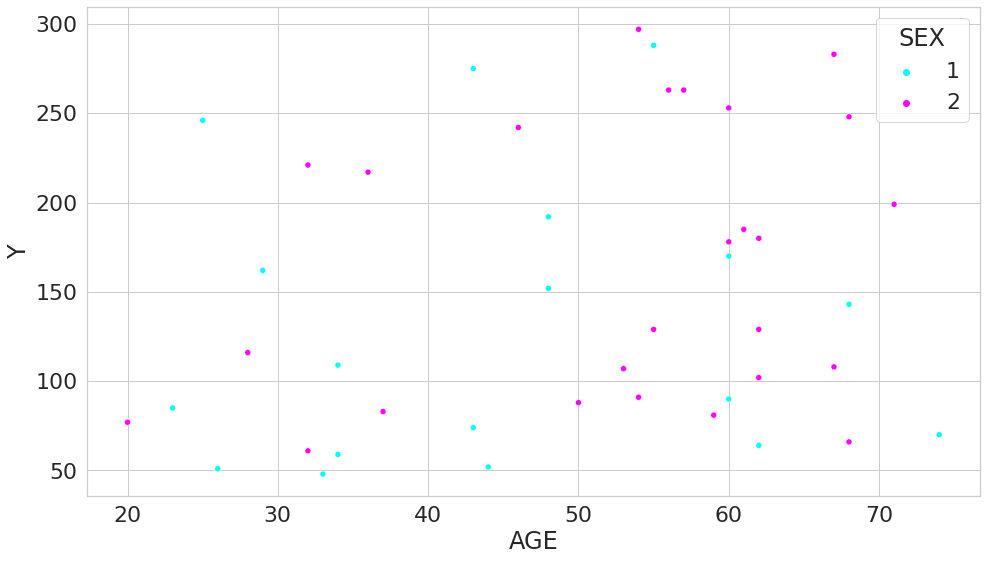

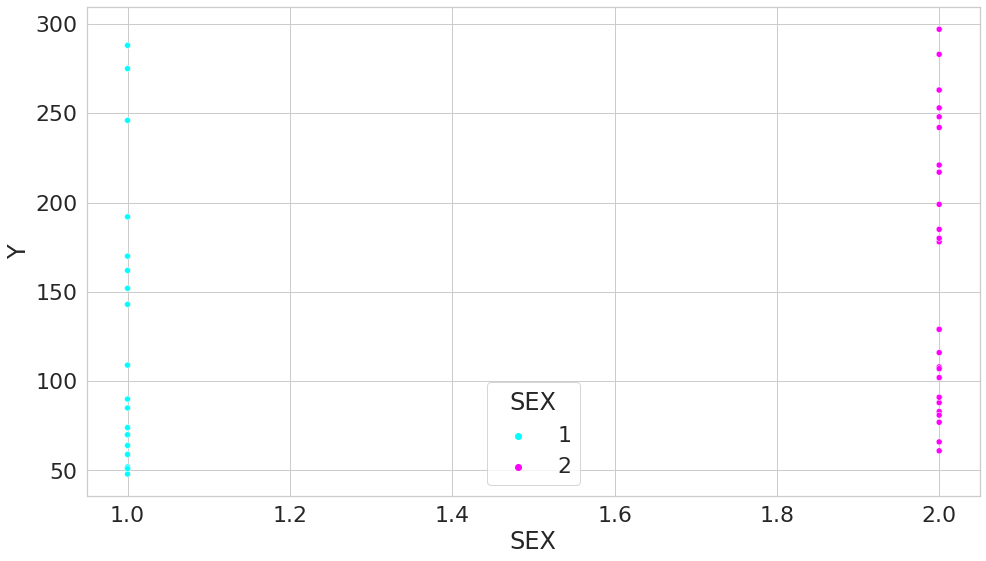

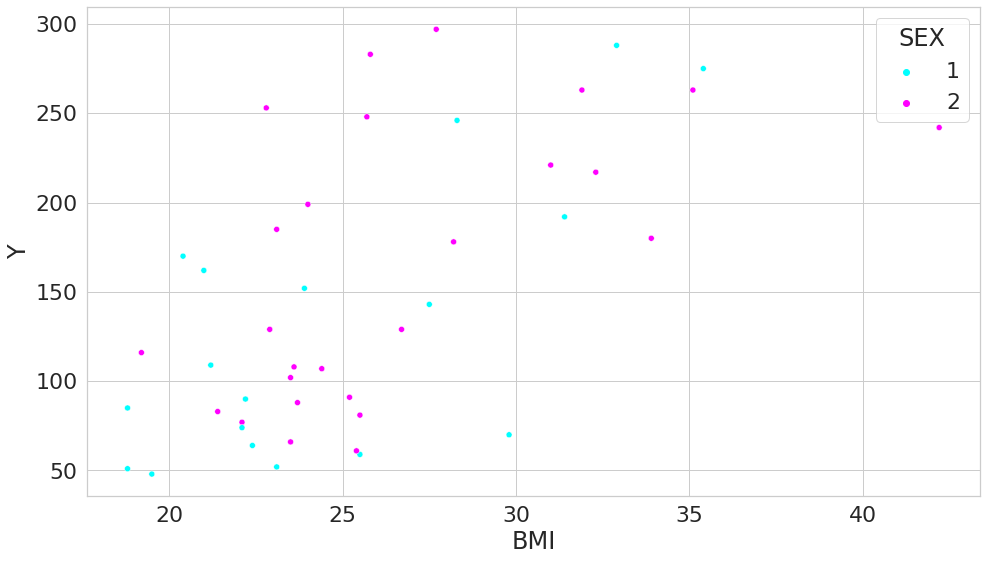

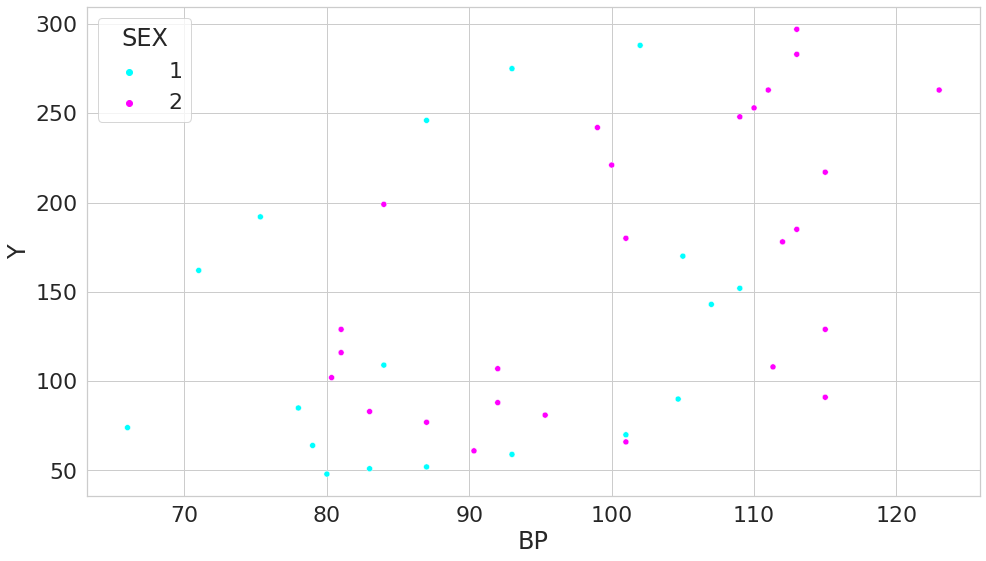

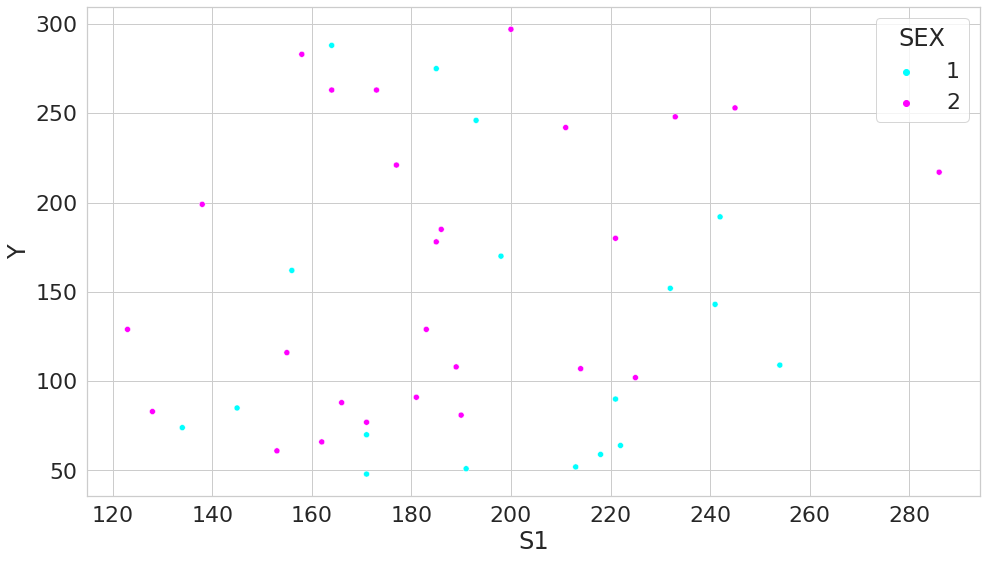

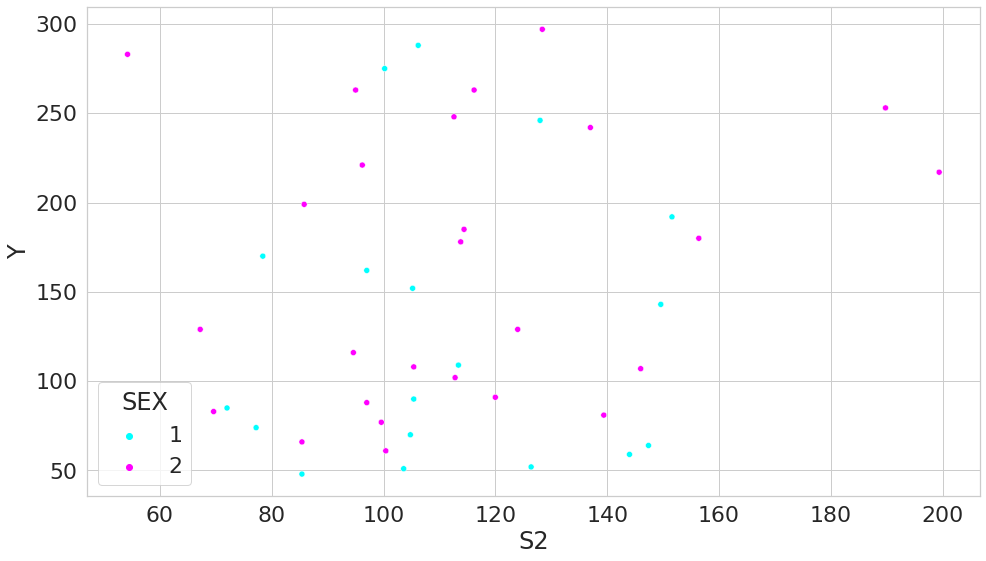

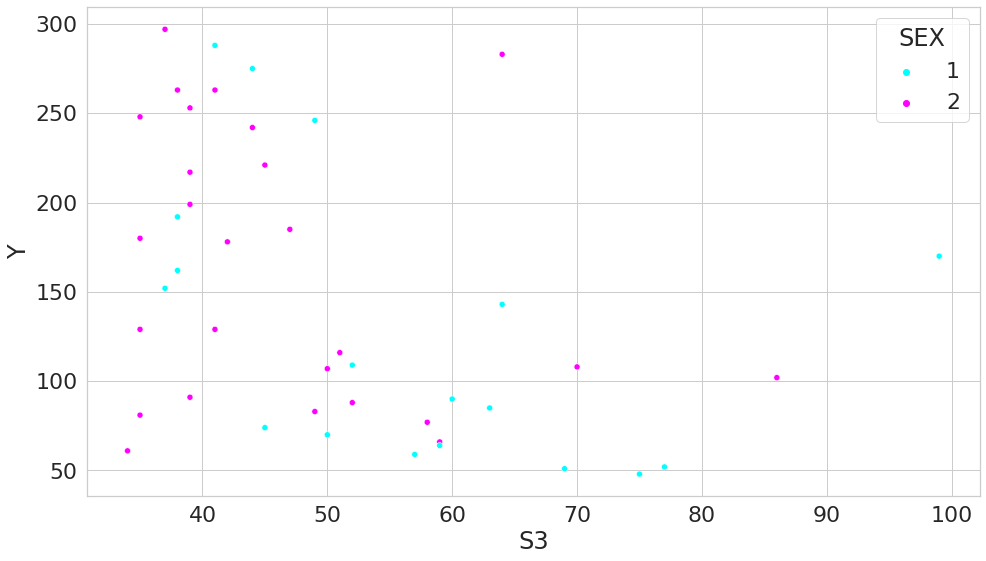

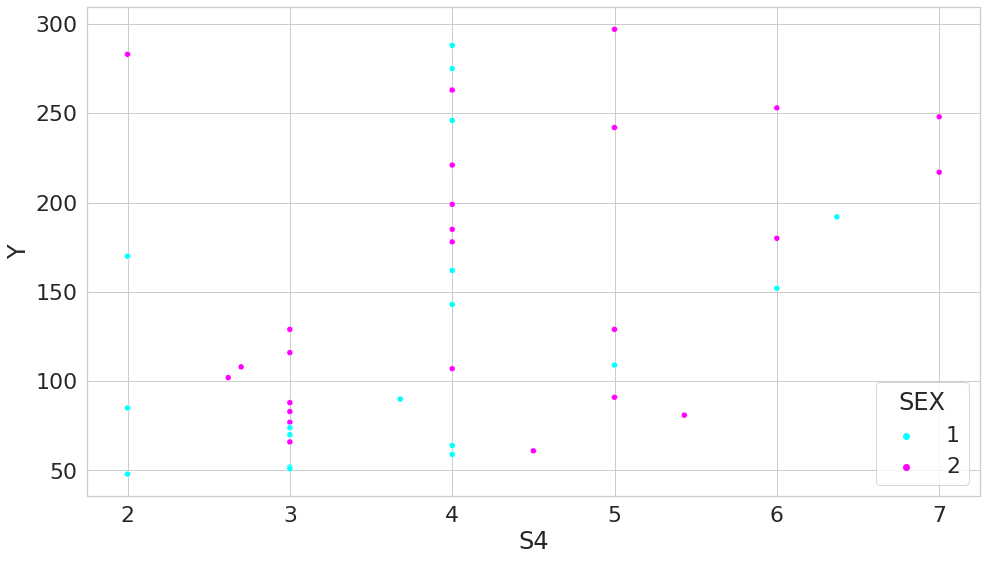

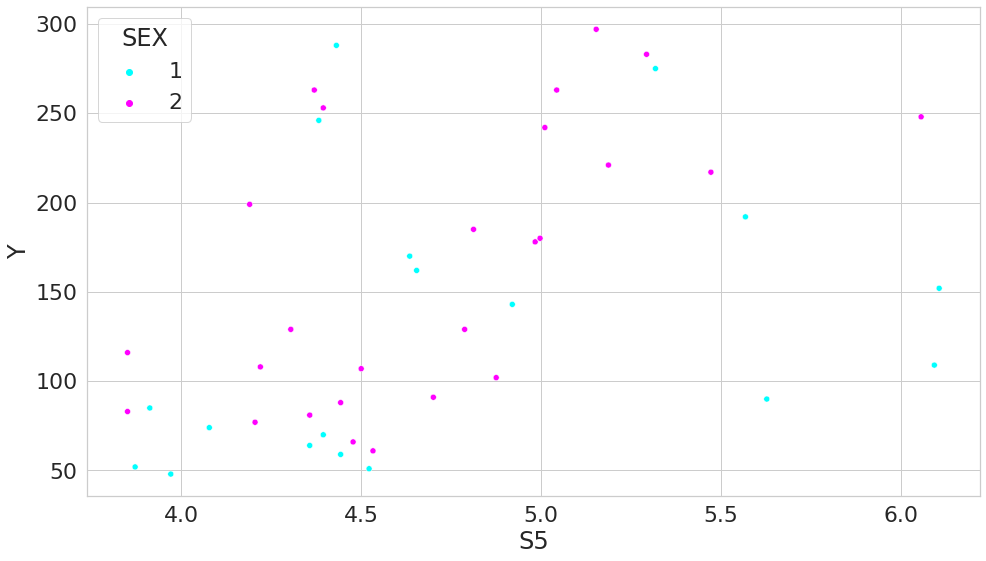

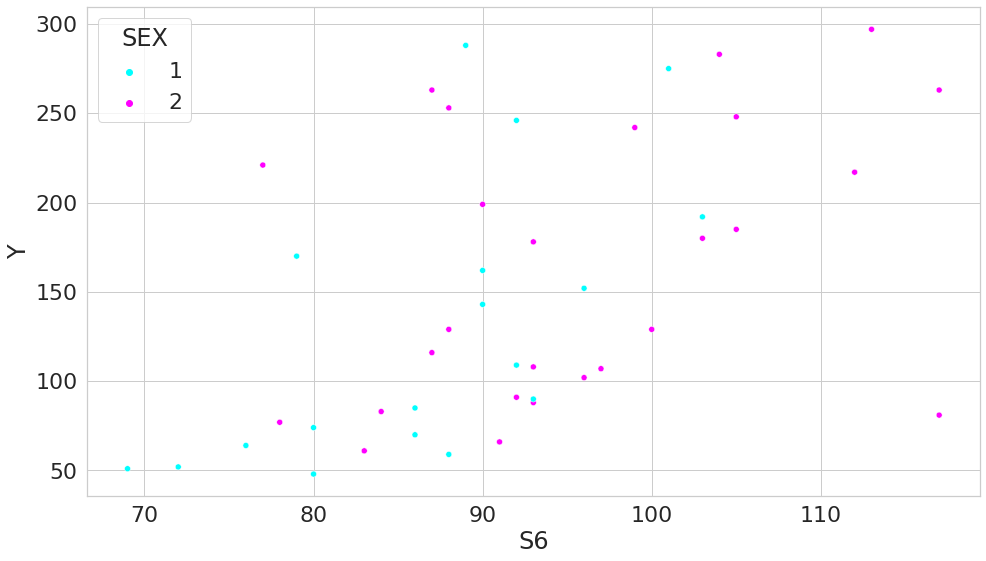

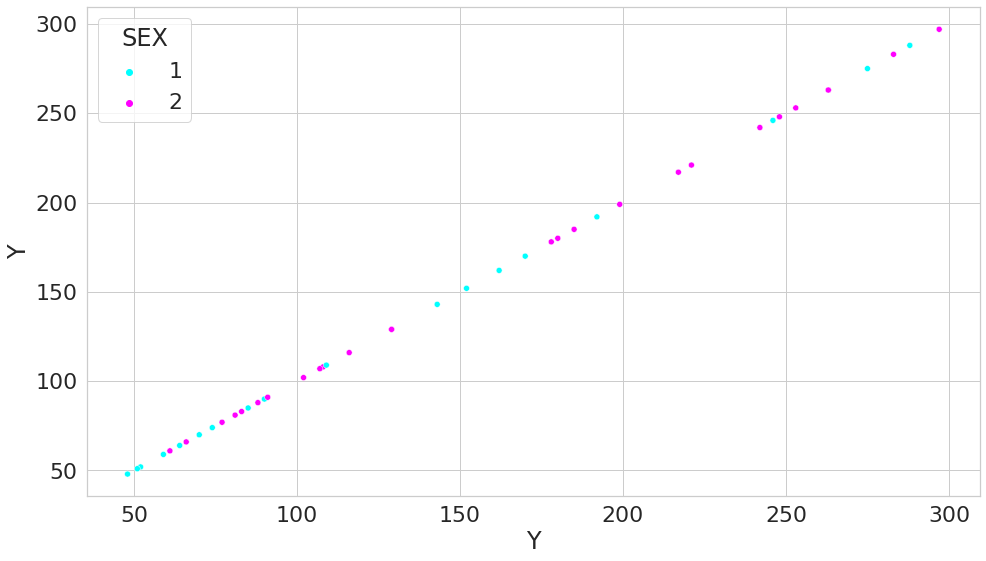

In [11]:
for db in diabetes.columns: # visuals on random sample of data
     plt.figure(figsize=(16, 9))
     sns.scatterplot(data=sample_df, x=db, y='Y', hue='SEX',
                     palette='cool', legend='full')
# Hue: Sex not clarified which one is which (1 vs. 2) for anonymity purposes.

# Y is the dependent variable we are measuring calculated by indicators (multi-x variables) provided.
# It looks like Y is very much correlated with BMI, S5 and S6, and BP, positively. Whereas we can see a strong negative
# correlation between S3 and Y.

### Split the data for training and testing

In [12]:
from sklearn.model_selection import train_test_split #75% train and 25% test split -- default 

arr_indp = ['AGE','SEX','BMI','BP','S1','S2','S3','S4','S5','S6']

X_train, X_test, y_train, y_test = \
    train_test_split(diabetes[arr_indp], diabetes['Y'], random_state=11)

print(f'Shape of training set = {X_train.shape}')
print(f'Shape of testing  set = {X_test.shape}')


Shape of training set = (331, 10)
Shape of testing  set = (111, 10)


### Train the model 

In [13]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()
linear_regression.fit(X=X_train, y=y_train)

for i, name in enumerate(arr_indp): # using array of column names created earlier
    print(f'{name}: {linear_regression.coef_[i]:24.20f}')

print()
print(f'y-intercept: {linear_regression.intercept_:23.20f}')

AGE:  -0.21875079007445499824
SEX: -25.39915392522709680634
BMI:   5.63764060060980298772
BP:   1.06905160309024704901
S1:  -0.46254234070692490377
S2:   0.21503794076694582316
S3:  -0.48280715720259048673
S4:  -0.04240805233348587944
S5:  56.72900990425515743709
S6:   0.25045853252026439861

y-intercept: -249.03105144135923865178


### Test the model 

In [14]:
import math
from sklearn import metrics

predicted = linear_regression.predict(X_test)
expected  = y_test

r2 = metrics.r2_score(expected, predicted)
r  = math.sqrt(r2)

print(f'coefficient of determination = {r2:.1f}')
print(f'     correlation coefficient = {r:.1f}')

# Looks like correlation coefficent is 0.7, which is pretty good--indicating a strong postive linear relationship among the variables.

coefficient of determination = 0.5
     correlation coefficient = 0.7


### Visualize the expected vs. predicted Y measure

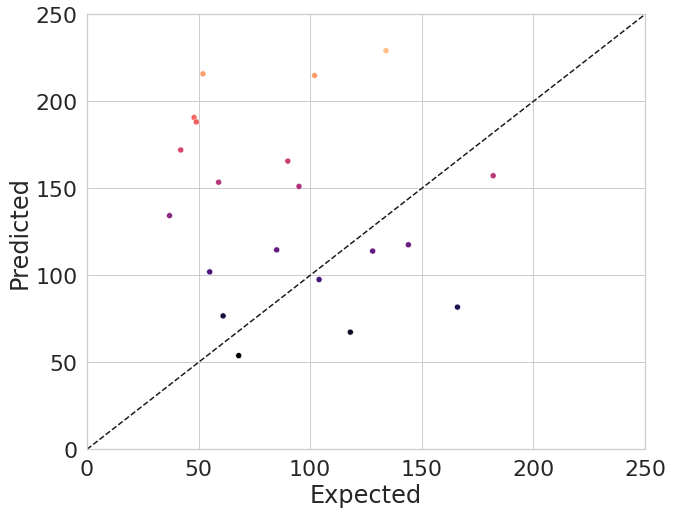

In [15]:
import numpy as np

df = pd.DataFrame()

df['Expected']  = pd.Series(expected)
df['Predicted'] = pd.Series(predicted)

figure = plt.figure(figsize=(10,8))

axes = sns.scatterplot(data=df, x='Expected', y='Predicted', 
                       hue='Predicted', palette='magma', 
                       legend=False)

#start = min(expected.min(), predicted.min())
#end   = max(expected.max(), predicted.max())

axes.set_xlim(0, 250)
axes.set_ylim(0, 250)

line = plt.plot([0, 250], [0, 250], 'k--')

Thoughts on how to improve our model?

If we had removed columns that were not very well correlated with the Y measure, such as sex or some of the blood serum measurements (S1 and S2 and S4), we may have resulted in a more accurate model. Also, if our n (sample size) was larger, it would have provided us with more training data to work with and hence, more accurate model.